In [182]:
# Loading all required packages
# If any of it fails, do not panic. Just install it using "pip3 install <package_name>" or by using conda install package_name
import numpy as np # linear algebra
import seaborn as sns
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import time
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
%matplotlib inline
from sklearn.metrics import roc_auc_score,roc_curve,precision_score,recall_score,accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")


In [183]:
# Loading Dataset
data_variants = pd.read_csv('E:\Phishing\phishing.csv')
#Loading training_text dataset. This is separated by ||
data_text =pd.read_csv("E:\Phishing\phishing.csv",sep="\|\|",engine="python",names=["Index","TEXT"],skiprows=1)


In [184]:
data_variants.head()

Index  UsingIP  LongURL  ShortURL  Symbol@  Redirecting//  PrefixSuffix-  \
0      0        1        1         1        1              1             -1   
1      1        1        0         1        1              1             -1   
2      2        1        0         1        1              1             -1   
3      3        1        0        -1        1              1             -1   
4      4       -1        0        -1        1             -1             -1   

   SubDomains  HTTPS  DomainRegLen  ...  UsingPopupWindow  IframeRedirection  \
0           0      1            -1  ...                 1                  1   
1          -1     -1            -1  ...                 1                  1   
2          -1     -1             1  ...                 1                  1   
3           1      1            -1  ...                -1                  1   
4           1      1            -1  ...                 1                  1   

   AgeofDomain  DNSRecording  WebsiteTraffic  PageRank  GoogleIndex  \
0           -1            -1               0        -1            1   
1            1            -1               1        -1            1   
2           -1            -1               1        -1            1   
3           -1            -1               0        -1            1   
4            1             1               1        -1            1   

   LinksPointingToPage  StatsReport  class  
0                    1            1     -1  
1                    0           -1     -1  
2                   -1            1     -1  
3                    1            1      1  
4                   -1           -1      1  

[5 rows x 32 columns]

In [185]:
data_variants.info()
data_variants.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [186]:
data_variants.describe()

Index       UsingIP       LongURL      ShortURL       Symbol@  \
count  11054.000000  11054.000000  11054.000000  11054.000000  11054.000000   
mean    5526.500000      0.313914     -0.633345      0.738737      0.700561   
std     3191.159272      0.949495      0.765973      0.674024      0.713625   
min        0.000000     -1.000000     -1.000000     -1.000000     -1.000000   
25%     2763.250000     -1.000000     -1.000000      1.000000      1.000000   
50%     5526.500000      1.000000     -1.000000      1.000000      1.000000   
75%     8289.750000      1.000000     -1.000000      1.000000      1.000000   
max    11053.000000      1.000000      1.000000      1.000000      1.000000   

       Redirecting//  PrefixSuffix-    SubDomains         HTTPS  DomainRegLen  \
count   11054.000000   11054.000000  11054.000000  11054.000000  11054.000000   
mean        0.741632      -0.734938      0.064049      0.251040     -0.336711   
std         0.670837       0.678165      0.817492      0.911856      0.941651   
min        -1.000000      -1.000000     -1.000000     -1.000000     -1.000000   
25%         1.000000      -1.000000     -1.000000     -1.000000     -1.000000   
50%         1.000000      -1.000000      0.000000      1.000000     -1.000000   
75%         1.000000      -1.000000      1.000000      1.000000      1.000000   
max         1.000000       1.000000      1.000000      1.000000      1.000000   

       ...  UsingPopupWindow  IframeRedirection   AgeofDomain  DNSRecording  \
count  ...      11054.000000       11054.000000  11054.000000  11054.000000   
mean   ...          0.613353           0.816899      0.061335      0.377239   
std    ...          0.789845           0.576807      0.998162      0.926158   
min    ...         -1.000000          -1.000000     -1.000000     -1.000000   
25%    ...          1.000000           1.000000     -1.000000     -1.000000   
50%    ...          1.000000           1.000000      1.000000      1.000000   
75%    ...          1.000000           1.000000      1.000000      1.000000   
max    ...          1.000000           1.000000      1.000000      1.000000   

       WebsiteTraffic      PageRank   GoogleIndex  LinksPointingToPage  \
count    11054.000000  11054.000000  11054.000000         11054.000000   
mean         0.287407     -0.483626      0.721549             0.343948   
std          0.827680      0.875314      0.692395             0.569936   
min         -1.000000     -1.000000     -1.000000            -1.000000   
25%          0.000000     -1.000000      1.000000             0.000000   
50%          1.000000     -1.000000      1.000000             0.000000   
75%          1.000000      1.000000      1.000000             1.000000   
max          1.000000      1.000000      1.000000             1.000000   

        StatsReport         class  
count  11054.000000  11054.000000  
mean       0.719739      0.113986  
std        0.694276      0.993527  
min       -1.000000     -1.000000  
25%        1.000000     -1.000000  
50%        1.000000      1.000000  
75%        1.000000      1.000000  
max        1.000000      1.000000  

[8 rows x 32 columns]

In [187]:
data_text.head(32)


Index  TEXT
0   0,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1...   NaN
1   1,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1...   NaN
2   2,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,...   NaN
3   3,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1...   NaN
4   4,-1,0,-1,1,-1,-1,1,1,-1,1,1,-1,1,0,0,-1,-1,-1...   NaN
5   5,1,0,-1,1,1,-1,-1,-1,1,1,1,1,-1,-1,0,-1,-1,-1...   NaN
6   6,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,-1,-1,1,1,0...   NaN
7   7,1,0,-1,1,1,-1,1,1,-1,1,1,-1,1,0,1,-1,1,1,0,1...   NaN
8   8,1,1,-1,1,1,-1,-1,1,-1,1,1,1,1,0,1,-1,1,1,0,1...   NaN
9   9,1,1,1,1,1,-1,0,1,1,1,1,1,-1,0,0,-1,-1,-1,0,1...   NaN
10  10,1,1,-1,1,1,-1,1,-1,-1,1,1,1,1,-1,-1,-1,-1,-...   NaN
11  11,-1,1,-1,1,-1,-1,0,0,1,1,1,-1,-1,-1,1,-1,1,1...   NaN
12  12,1,1,-1,1,1,-1,0,-1,1,1,1,1,-1,-1,-1,-1,1,1,...   NaN
13  13,1,1,-1,1,1,1,-1,1,-1,1,1,-1,1,0,1,1,1,1,0,1...   NaN
14  14,1,-1,-1,-1,1,-1,0,0,1,1,1,1,-1,-1,0,-1,1,1,...   NaN
15  15,1,-1,-1,1,1,-1,1,1,-1,1,1,-1,1,0,-1,-1,-1,-...   NaN
16  16,1,-1,1,1,1,-1,-1,0,1,1,-1,1,1,0,-1,-1,-1,-1...   NaN
17  17,1,1,1,1,1,-1,-1,1,1,1,1,-1,-1,0,-1,-1,-1,-1...   NaN
18  18,1,1,1,1,1,-1,-1,1,-1,1,1,1,1,0,0,-1,-1,-1,0...   NaN
19  19,1,0,-1,1,1,-1,0,1,-1,1,1,1,1,0,0,-1,-1,-1,0...   NaN
20  20,1,0,1,1,1,-1,0,1,1,1,1,-1,-1,0,-1,-1,-1,-1,...   NaN
21  21,1,1,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,0,-1,1,1,0...   NaN
22  22,1,1,1,1,1,-1,1,0,-1,1,1,1,1,0,0,-1,1,1,0,1,...   NaN
23  23,1,-1,-1,-1,1,-1,1,1,-1,1,1,-1,-1,0,0,-1,1,1...   NaN
24  24,1,-1,1,1,1,-1,0,1,-1,1,1,1,1,1,0,-1,1,1,0,1...   NaN
25  25,1,-1,1,1,1,-1,0,-1,1,1,1,-1,-1,-1,-1,-1,-1,...   NaN
26  26,1,-1,-1,1,1,1,-1,1,1,1,1,1,-1,1,0,-1,-1,-1,...   NaN
27  27,1,-1,-1,1,-1,1,-1,1,-1,1,1,1,1,1,0,-1,1,1,1...   NaN
28  28,1,-1,1,1,1,-1,-1,1,-1,1,1,1,1,1,0,-1,1,1,0,...   NaN
29  29,1,-1,1,1,1,-1,-1,1,-1,1,1,-1,1,0,1,-1,1,1,0...   NaN
30  30,1,-1,1,1,1,-1,-1,1,-1,-1,1,-1,1,0,-1,-1,-1,...   NaN
31  31,1,-1,1,1,1,1,1,1,-1,1,1,1,1,1,1,1,-1,-1,0,1...   NaN

In [188]:
# Checking dimention of data
data_variants.shape

(11054, 32)

In [189]:
data_text.columns


Index(['Index', 'TEXT'], dtype='object')

In [190]:
data_text.shape

(11054, 2)

In [191]:
data_variants['Index'].unique()

array([    0,     1,     2, ..., 11051, 11052, 11053], dtype=int64)

In [192]:
data_variants.isnull().sum()

Index                  0
UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

In [193]:
X= data_variants.drop(columns= 'class')
X.head()

Index  UsingIP  LongURL  ShortURL  Symbol@  Redirecting//  PrefixSuffix-  \
0      0        1        1         1        1              1             -1   
1      1        1        0         1        1              1             -1   
2      2        1        0         1        1              1             -1   
3      3        1        0        -1        1              1             -1   
4      4       -1        0        -1        1             -1             -1   

   SubDomains  HTTPS  DomainRegLen  ...  DisableRightClick  UsingPopupWindow  \
0           0      1            -1  ...                  1                 1   
1          -1     -1            -1  ...                  1                 1   
2          -1     -1             1  ...                  1                 1   
3           1      1            -1  ...                  1                -1   
4           1      1            -1  ...                  1                 1   

   IframeRedirection  AgeofDomain  DNSRecording  WebsiteTraffic  PageRank  \
0                  1           -1            -1               0        -1   
1                  1            1            -1               1        -1   
2                  1           -1            -1               1        -1   
3                  1           -1            -1               0        -1   
4                  1            1             1               1        -1   

   GoogleIndex  LinksPointingToPage  StatsReport  
0            1                    1            1  
1            1                    0           -1  
2            1                   -1            1  
3            1                    1            1  
4            1                   -1           -1  

[5 rows x 31 columns]

In [194]:
X= data_variants.drop(columns='class')
X = MinMaxScaler().fit_transform(X)
Y=data_variants['class']
Y=pd.DataFrame(Y)

In [195]:
def complete_test_2D(X, Y, plot_name = ''):
    Small_data_variants = pd.DataFrame(data = X, columns = ['C1', 'C2'])
    Small_data_variants = pd.concat([Small_data_variants,  data_variants['class']], axis = 1)
    Small_data_variants['class'] = LabelEncoder().fit_transform(Small_data_variants['class'])
    forest_test(X, Y)
    data = []
    for clas, col, name in zip((1, 0), ['red', 'darkblue'], ['Phishing', 'Legit']):

        trace = dict(
            type='scatter',
            x= Small_data_variants.loc[Small_data_variants['class'] == clas, 'C1'],
            y= Small_data_variants.loc[Small_data_variants['class'] == clas, 'C2'],
            mode= 'markers',
            name= name,
            marker=dict(
                color=col,
                size=12,
                line=dict(
                    color='rgba(217, 217, 217, 0.14)',
                    width=0.5),
                opacity=0.8)
        )
        data.append(trace)

    layout = dict(
            title= plot_name + ' 2D Dimensionality Reduction',
            xaxis=dict(title='C1', showline=False),
            yaxis=dict(title='C2', showline=False)
    )
    fig = dict(data=data, layout=layout)
    iplot(fig)

In [196]:
def complete_test_3D(X, Y, plot_name = ''):
    Small_data_variants = pd.DataFrame(data = X, columns = ['C1', 'C2', 'C3'])
    Small_data_variants = pd.concat([Small_data_variants,data_variants['class']], axis = 1)
    Small_data_variants['class'] = LabelEncoder().fit_transform(Small_data_variants['class'])
    forest_test(X, Y)
    data = []
    for clas, col, name in zip((1, 0), ['red', 'darkblue'], ['Phishing', 'Legit']):

        trace = dict(
            type='scatter3d',
            x= Small_data_variants.loc[Small_data_variants['class'] == clas, 'C1'],
            y= Small_data_variants.loc[Small_data_variants['class'] == clas, 'C2'],
            z= Small_data_variants.loc[Small_data_variants['class'] == clas, 'C3'],
            mode= 'markers',
            name= name
        )
        data.append(trace)

    layout = {
        "scene": {
          "xaxis": {
            "title": "C1", 
            "showline": False
          }, 
          "yaxis": {
            "title": "C2", 
            "showline": False
          }, 
          "zaxis": {
            "title": "C3", 
            "showline": False
          }
        }, 
        "title": plot_name + ' 3D Dimensionality Reduction'
    }
    fig = dict(data=data, layout=layout)
    iplot(fig)

In [197]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
PCA_data_variants = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
PCA_data_variants = pd.concat([PCA_df,data_variants['class']], axis = 1)
PCA_data_variants['class'] = LabelEncoder().fit_transform(PCA_data_variants['class'])
PCA_data_variants.head()

PC1       PC2  class
0  5526.500194 -0.369082      0
1  5525.500259  0.991200      0
2  5524.500264 -0.694931      0
3  5523.500144  1.012008      1
4  5522.499682  1.744903      1

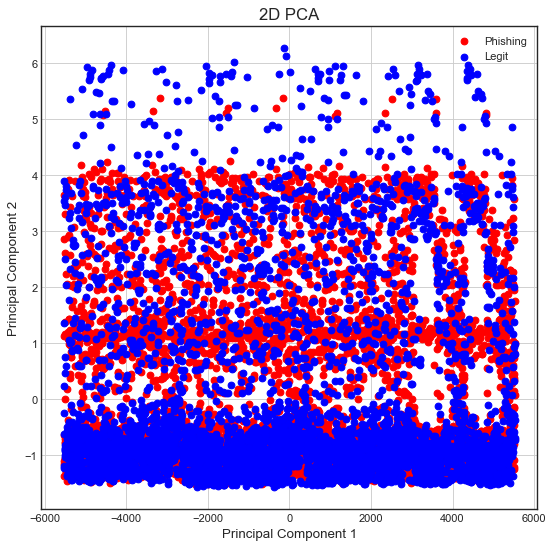

In [201]:
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
classes = [1, 0]
colors = ['r', 'b']
for clas, color in zip(classes, colors):
   plt.scatter(PCA_data_variants.loc[PCA_data_variants['class'] == clas, 'PC1'], PCA_data_variants.loc[PCA_data_variants['class'] == clas, 'PC2'],c = color)

plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('2D PCA', fontsize = 15)
plt.legend(['Phishing', 'Legit'])
plt.grid()

In [202]:
def forest_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, random_state = 101)
    start = time.process_time()
    trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
    print(time.process_time() - start)
    predictionforest = trainedforest.predict(X_Test)
    print(confusion_matrix(Y_Test,predictionforest))
    print(classification_report(Y_Test,predictionforest))
forest_test(X,Y)


5.078125
[[1381   65]
 [  53 1818]]
              precision    recall  f1-score   support

          -1       0.96      0.96      0.96      1446
           1       0.97      0.97      0.97      1871

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317



In [203]:
complete_test_2D(X_pca, Y, 'PCA')

8.0
[[1197  249]
 [ 238 1633]]
              precision    recall  f1-score   support

          -1       0.83      0.83      0.83      1446
           1       0.87      0.87      0.87      1871

    accuracy                           0.85      3317
   macro avg       0.85      0.85      0.85      3317
weighted avg       0.85      0.85      0.85      3317



In [204]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
complete_test_3D(X_pca, Y, 'PCA')

7.6875
[[1276  170]
 [ 171 1700]]
              precision    recall  f1-score   support

          -1       0.88      0.88      0.88      1446
           1       0.91      0.91      0.91      1871

    accuracy                           0.90      3317
   macro avg       0.90      0.90      0.90      3317
weighted avg       0.90      0.90      0.90      3317



In [205]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=3)
X_ica = ica.fit_transform(X)
forest_test(X_ica, Y)

7.953125
[[1298  148]
 [ 160 1711]]
              precision    recall  f1-score   support

          -1       0.89      0.90      0.89      1446
           1       0.92      0.91      0.92      1871

    accuracy                           0.91      3317
   macro avg       0.91      0.91      0.91      3317
weighted avg       0.91      0.91      0.91      3317



In [206]:
complete_test_3D(X_ica, Y, 'ICA')

7.484375
[[1295  151]
 [ 158 1713]]
              precision    recall  f1-score   support

          -1       0.89      0.90      0.89      1446
           1       0.92      0.92      0.92      1871

    accuracy                           0.91      3317
   macro avg       0.91      0.91      0.91      3317
weighted avg       0.91      0.91      0.91      3317



In [207]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
# run an LDA and use it to transform the features
X_lda = lda.fit(X, Y).transform(X)
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_lda.shape[1])

Original number of features: 31
Reduced number of features: 1


In [208]:
forest_test(X_lda, Y)

6.765625
[[1266  180]
 [ 190 1681]]
              precision    recall  f1-score   support

          -1       0.87      0.88      0.87      1446
           1       0.90      0.90      0.90      1871

    accuracy                           0.89      3317
   macro avg       0.89      0.89      0.89      3317
weighted avg       0.89      0.89      0.89      3317



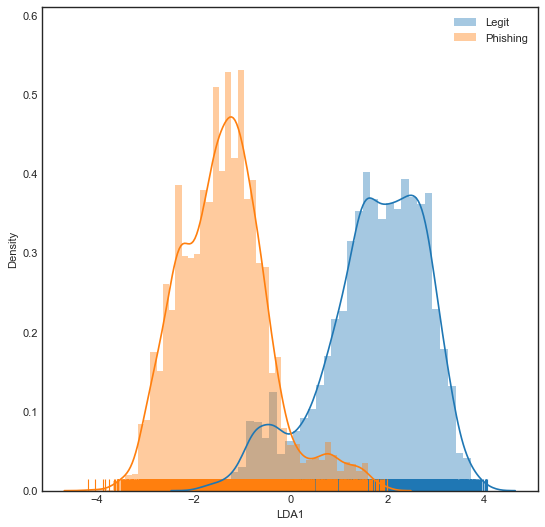

In [209]:
LDA_data_variants = pd.DataFrame(data = X_lda, columns = ['LDA1'])
LDA_data_variants = pd.concat([LDA_data_variants, data_variants['class']], axis = 1)
LDA_data_variants['class'] = LabelEncoder().fit_transform(LDA_data_variants['class'])

figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.distplot(LDA_data_variants.loc[LDA_data_variants['class'] == 0]['LDA1'], label = 'Legit', hist=True, kde=True, rug=True)
sns.distplot(LDA_data_variants.loc[LDA_data_variants['class'] == 1]['LDA1'], label = 'Phishing', hist=True, kde=True, rug=True)
plt.legend(loc='upper right')

In [210]:
from sklearn.manifold import TSNE
start = time.process_time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
X_tsne = tsne.fit_transform(X)
print(time.process_time() - start)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 11054 samples in 0.001s...
[t-SNE] Computed neighbors for 11054 samples in 6.199s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11054
[t-SNE] Computed conditional probabilities for sample 2000 / 11054
[t-SNE] Computed conditional probabilities for sample 3000 / 11054
[t-SNE] Computed conditional probabilities for sample 4000 / 11054
[t-SNE] Computed conditional probabilities for sample 5000 / 11054
[t-SNE] Computed conditional probabilities for sample 6000 / 11054
[t-SNE] Computed conditional probabilities for sample 7000 / 11054
[t-SNE] Computed conditional probabilities for sample 8000 / 11054
[t-SNE] Computed conditional probabilities for sample 9000 / 11054
[t-SNE] Computed conditional probabilities for sample 10000 / 11054
[t-SNE] Computed conditional probabilities for sample 11000 / 11054
[t-SNE] Computed conditional probabilities for sample 11054 / 11054
[t-SNE] Mean sigma: 0.639436
[t-SNE] KL divergenc

In [211]:
complete_test_2D(X_tsne, Y, 'T-SNE')

7.265625
[[1330  116]
 [  97 1774]]
              precision    recall  f1-score   support

          -1       0.93      0.92      0.93      1446
           1       0.94      0.95      0.94      1871

    accuracy                           0.94      3317
   macro avg       0.94      0.93      0.93      3317
weighted avg       0.94      0.94      0.94      3317



In [214]:
from sklearn.manifold import TSNE
start = time.process_time()
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
X_tsne = tsne.fit_transform(X)
print(time.process_time() - start)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 11054 samples in 0.001s...
[t-SNE] Computed neighbors for 11054 samples in 5.232s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11054
[t-SNE] Computed conditional probabilities for sample 2000 / 11054
[t-SNE] Computed conditional probabilities for sample 3000 / 11054
[t-SNE] Computed conditional probabilities for sample 4000 / 11054
[t-SNE] Computed conditional probabilities for sample 5000 / 11054
[t-SNE] Computed conditional probabilities for sample 6000 / 11054
[t-SNE] Computed conditional probabilities for sample 7000 / 11054
[t-SNE] Computed conditional probabilities for sample 8000 / 11054
[t-SNE] Computed conditional probabilities for sample 9000 / 11054
[t-SNE] Computed conditional probabilities for sample 10000 / 11054
[t-SNE] Computed conditional probabilities for sample 11000 / 11054
[t-SNE] Computed conditional probabilities for sample 11054 / 11054
[t-SNE] Mean sigma: 0.639436
[t-SNE] KL divergenc

In [215]:
complete_test_3D(X_tsne, Y, 'T-SNE')

7.4375
[[1350   96]
 [  89 1782]]
              precision    recall  f1-score   support

          -1       0.94      0.93      0.94      1446
           1       0.95      0.95      0.95      1871

    accuracy                           0.94      3317
   macro avg       0.94      0.94      0.94      3317
weighted avg       0.94      0.94      0.94      3317



In [216]:
y= data_variants['class']
y= pd.DataFrame(y)
y.head()

class
0     -1
1     -1
2     -1
3      1
4      1

In [217]:
data_variants.info()
data_variants.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

Index       UsingIP       LongURL      ShortURL       Symbol@  \
count  11054.000000  11054.000000  11054.000000  11054.000000  11054.000000   
mean    5526.500000      0.313914     -0.633345      0.738737      0.700561   
std     3191.159272      0.949495      0.765973      0.674024      0.713625   
min        0.000000     -1.000000     -1.000000     -1.000000     -1.000000   
25%     2763.250000     -1.000000     -1.000000      1.000000      1.000000   
50%     5526.500000      1.000000     -1.000000      1.000000      1.000000   
75%     8289.750000      1.000000     -1.000000      1.000000      1.000000   
max    11053.000000      1.000000      1.000000      1.000000      1.000000   

       Redirecting//  PrefixSuffix-    SubDomains         HTTPS  DomainRegLen  \
count   11054.000000   11054.000000  11054.000000  11054.000000  11054.000000   
mean        0.741632      -0.734938      0.064049      0.251040     -0.336711   
std         0.670837       0.678165      0.817492      0.911856      0.941651   
min        -1.000000      -1.000000     -1.000000     -1.000000     -1.000000   
25%         1.000000      -1.000000     -1.000000     -1.000000     -1.000000   
50%         1.000000      -1.000000      0.000000      1.000000     -1.000000   
75%         1.000000      -1.000000      1.000000      1.000000      1.000000   
max         1.000000       1.000000      1.000000      1.000000      1.000000   

       ...  UsingPopupWindow  IframeRedirection   AgeofDomain  DNSRecording  \
count  ...      11054.000000       11054.000000  11054.000000  11054.000000   
mean   ...          0.613353           0.816899      0.061335      0.377239   
std    ...          0.789845           0.576807      0.998162      0.926158   
min    ...         -1.000000          -1.000000     -1.000000     -1.000000   
25%    ...          1.000000           1.000000     -1.000000     -1.000000   
50%    ...          1.000000           1.000000      1.000000      1.000000   
75%    ...          1.000000           1.000000      1.000000      1.000000   
max    ...          1.000000           1.000000      1.000000      1.000000   

       WebsiteTraffic      PageRank   GoogleIndex  LinksPointingToPage  \
count    11054.000000  11054.000000  11054.000000         11054.000000   
mean         0.287407     -0.483626      0.721549             0.343948   
std          0.827680      0.875314      0.692395             0.569936   
min         -1.000000     -1.000000     -1.000000            -1.000000   
25%          0.000000     -1.000000      1.000000             0.000000   
50%          1.000000     -1.000000      1.000000             0.000000   
75%          1.000000      1.000000      1.000000             1.000000   
max          1.000000      1.000000      1.000000             1.000000   

        StatsReport         class  
count  11054.000000  11054.000000  
mean       0.719739      0.113986  
std        0.694276      0.993527  
min       -1.000000     -1.000000  
25%        1.000000     -1.000000  
50%        1.000000      1.000000  
75%        1.000000      1.000000  
max        1.000000      1.000000  

[8 rows x 32 columns]

In [218]:
list(set(data_variants.UsingIP))

[1, -1]

In [219]:
list(data_variants['UsingIP'].unique())

[1, -1]

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7737, 31)
(7737, 1)
(3317, 31)
(3317, 1)


In [221]:
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 7737 samples.
Testing set has 3317 samples.


<AxesSubplot:>

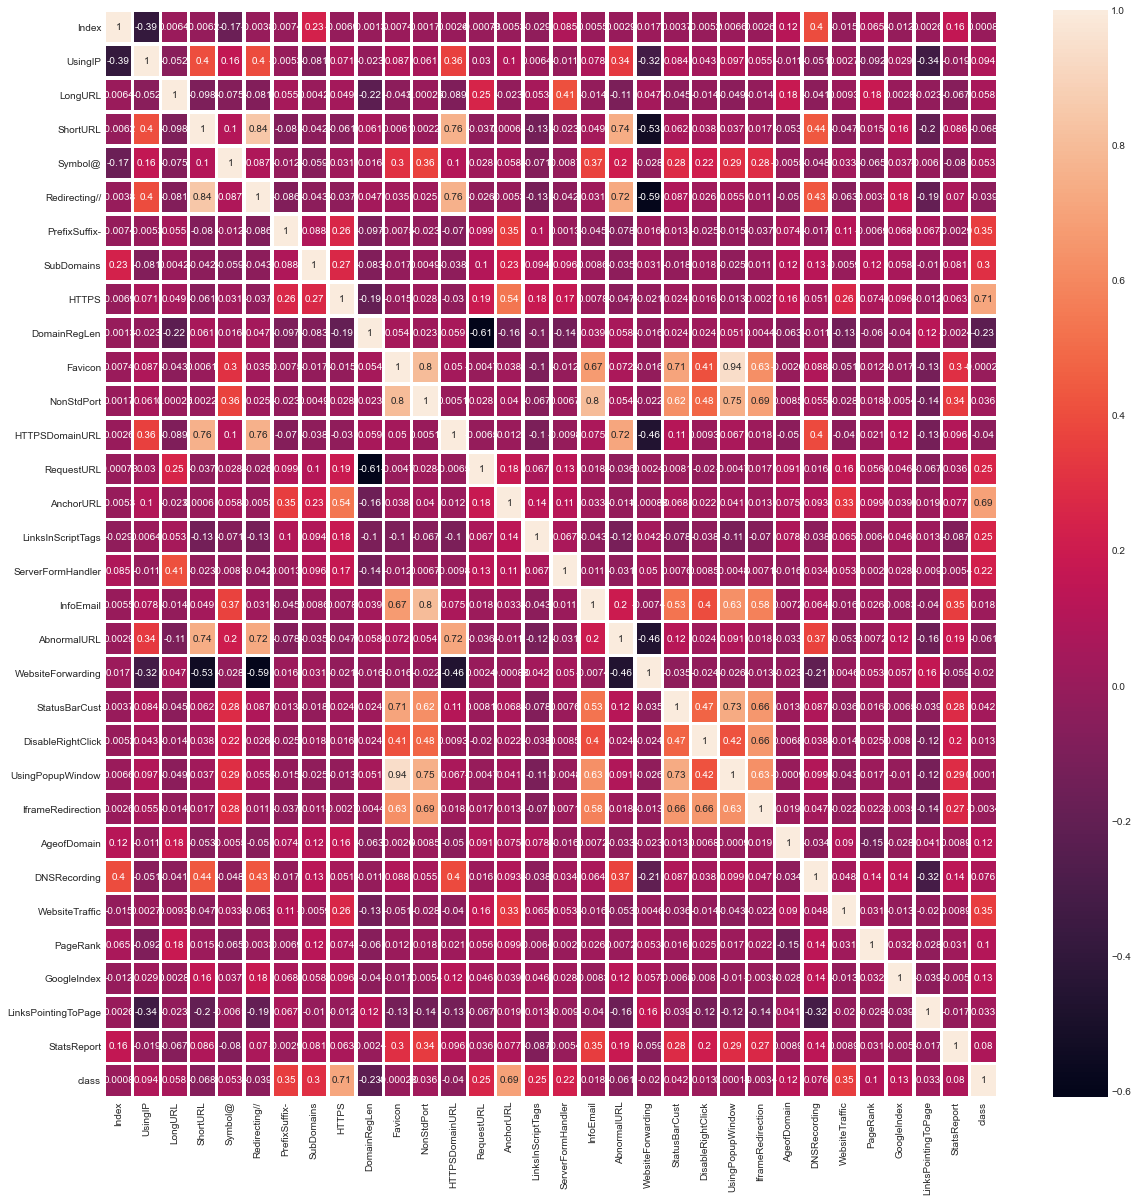

In [222]:
#correlation map
corr = data_variants.corr()
fig,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, annot=True, linewidths=2.5,ax=ax)

In [223]:
logreg=LogisticRegression()
model_1=logreg.fit(X_train,y_train)
logreg_predict= model_1.predict(X_test)
accuracy_score(logreg_predict,y_test)

0.9255351220982816

In [224]:
print(classification_report(logreg_predict,y_test))

              precision    recall  f1-score   support

          -1       0.91      0.92      0.91      1391
           1       0.94      0.93      0.94      1926

    accuracy                           0.93      3317
   macro avg       0.92      0.92      0.92      3317
weighted avg       0.93      0.93      0.93      3317



Accuracy: 0.9255351220982816


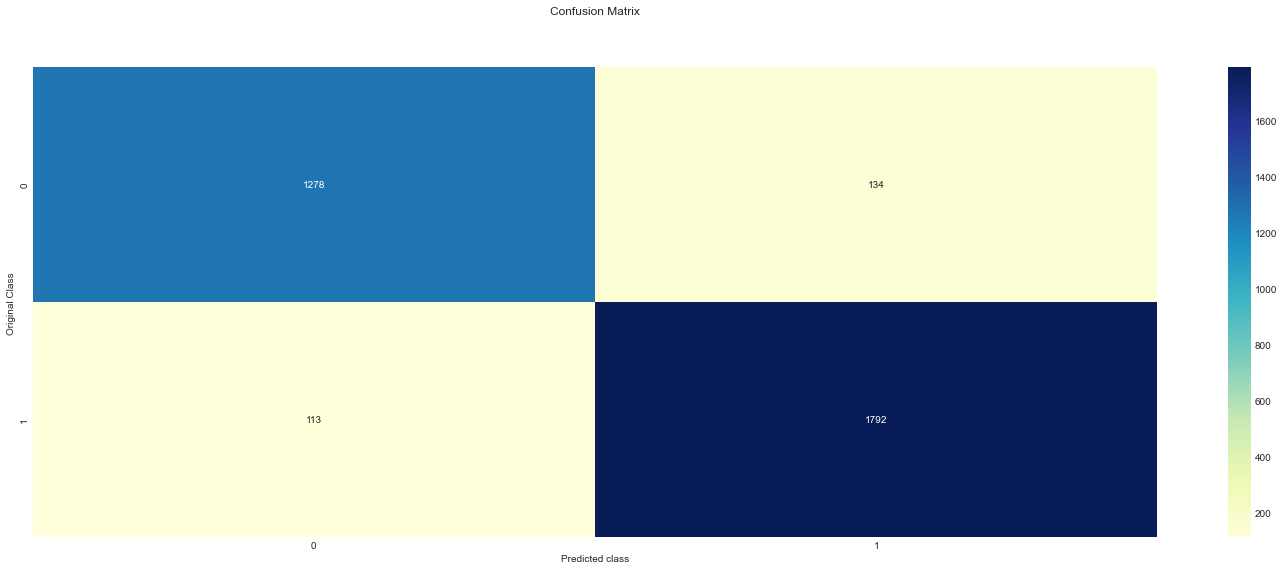

In [225]:
log_reg = LogisticRegression() 
log_reg.fit(X_train,y_train) 
y_pred_log = log_reg.predict(X_test) 
confusion_metric = confusion_matrix(y_test, y_pred_log)
class_names=[0,1] # name of classes
# fig, ax = plt.subplots() 
#tick_marks = np.orange(Len(class_names))
#plt.xticks(tickmarks, class_names) 
#plt.yticks(tick marks, class names) 
plt.figure(figsize=(20,7))
# create heatmap 
sns.heatmap(pd.DataFrame(confusion_metric), annot=True, cmap="YlGnBu", fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion Matrix', y=1.1) 
plt.ylabel('Original Class') 
plt.xlabel('Predicted class')
print("Accuracy:",accuracy_score(y_test, y_pred_log))
#print("Precision: ",metrics.precision_score(y_test, y_pred_Log)) 
#print("Recall:",metrics.recall_score(y_test, y_pred_Log))

Precision: 0.9304257528556594


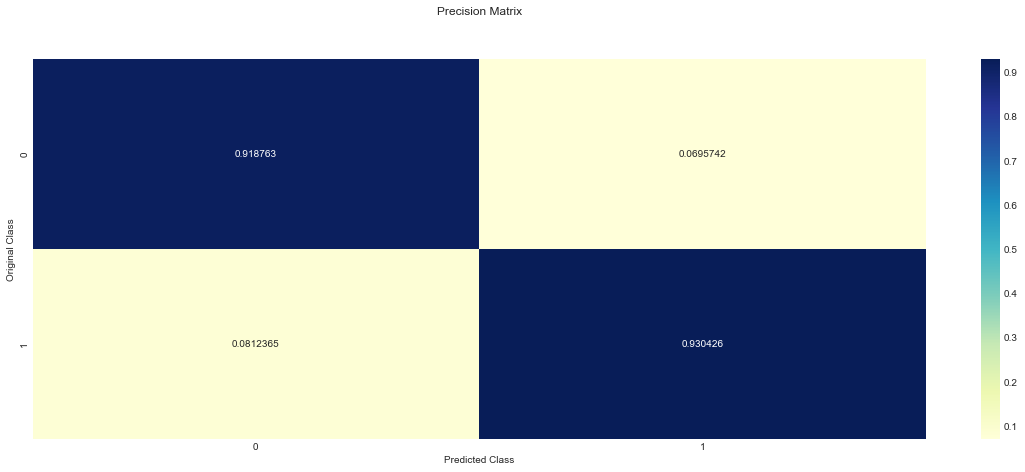

In [226]:
B = (pd.DataFrame(confusion_metric)/pd.DataFrame(confusion_metric).sum(axis=0))
plt.figure(figsize=(20,7))
sns.heatmap(B, annot=True,cmap="YlGnBu", fmt='g')
plt.title('Precision Matrix', y=1.1)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
print("Precision:",precision_score(y_test, y_pred_log))
plt.show()
           

Recall: 0.9406824146981627


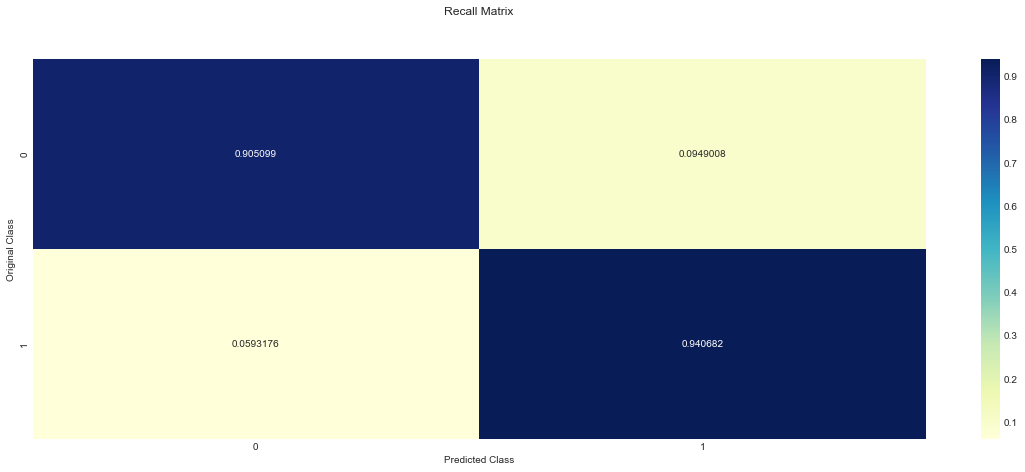

In [227]:
A = (((pd.DataFrame(confusion_metric).T)/(pd.DataFrame(confusion_metric).sum(axis=1))).T)
plt.figure(figsize=(20,7))
sns.heatmap(A, annot=True,cmap="YlGnBu", fmt='g')
plt.title('Recall Matrix', y=1.1)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
print("Recall:",recall_score(y_test, y_pred_log))
plt.show()

The AUC Value is: 0.922890782419903


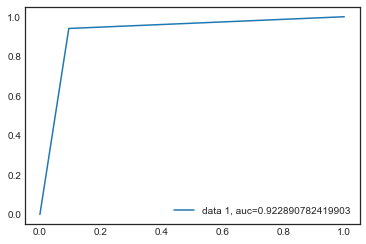

In [228]:
y_pred_proba = log_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_log)
auc = roc_auc_score(y_test, y_pred_log)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
print("The AUC Value is:", auc)
plt.legend(loc=4)
plt.show()

In [229]:
knn=KNeighborsClassifier(n_neighbors=3)
model_2= knn.fit(X_train,y_train)
knn_predict= model_2.predict(X_test)
accuracy_score(knn_predict,y_test)

0.9490503466988243

In [230]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

          -1       0.94      0.94      0.94      1412
           1       0.96      0.95      0.96      1905

    accuracy                           0.95      3317
   macro avg       0.95      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



Accuracy: 0.9490503466988243


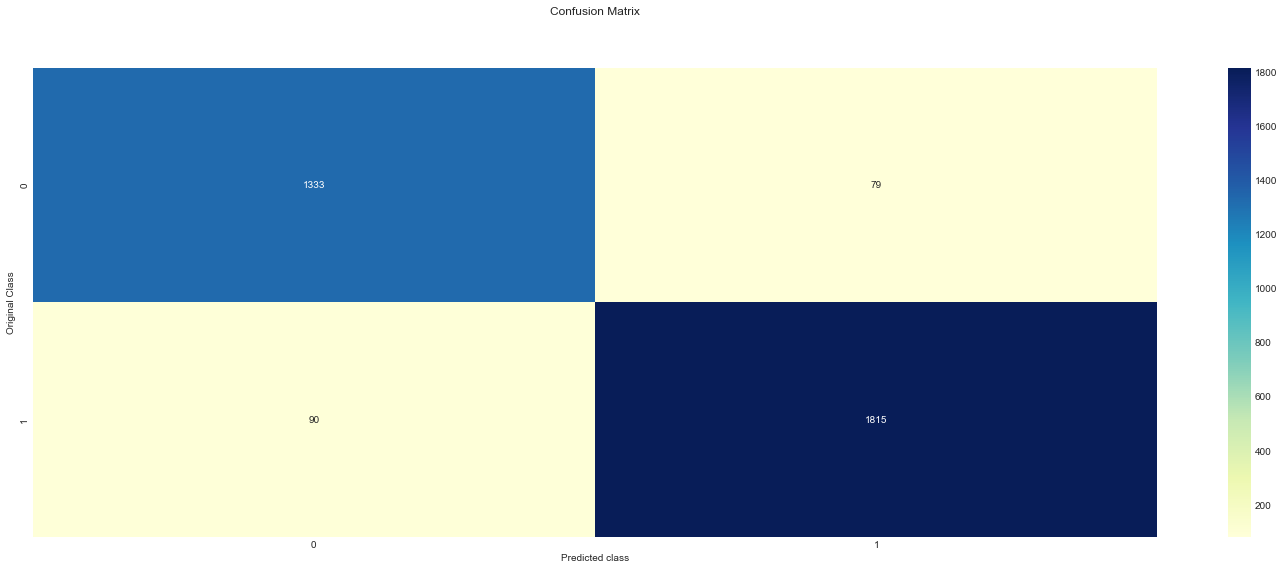

In [231]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train) 
y_pred_knn = knn.predict(X_test) 
confusion_metric = confusion_matrix(y_test, y_pred_knn)
class_names=[0,1] # name of classes
# fig, ax = plt.subplots() 
#tick_marks = np.orange(Len(class_names))
#plt.xticks(tickmarks, class_names) 
#plt.yticks(tick marks, class names) 
plt.figure(figsize=(20,7))
# create heatmap 
sns.heatmap(pd.DataFrame(confusion_metric), annot=True, cmap="YlGnBu", fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion Matrix', y=1.1) 
plt.ylabel('Original Class') 
plt.xlabel('Predicted class')
print("Accuracy:",accuracy_score(y_test, y_pred_knn))
#print("Precision: ",metrics.precision_score(y_test, y_pred_knn)) 
#print("Recall:",metrics.recall_score(y_test, y_pred_knn))

Precision: 0.9582893347412883


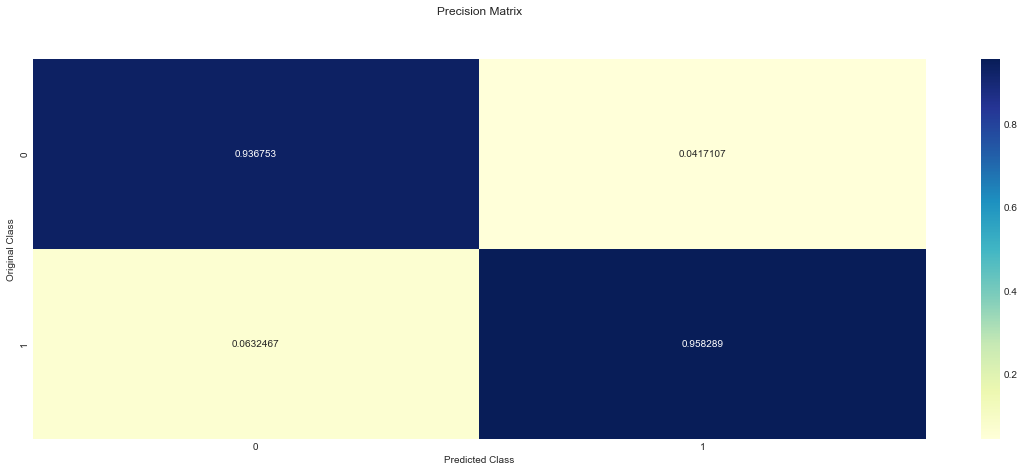

In [232]:
B = (pd.DataFrame(confusion_metric)/pd.DataFrame(confusion_metric).sum(axis=0))
plt.figure(figsize=(20,7))
sns.heatmap(B, annot=True,cmap="YlGnBu", fmt='g')
plt.title('Precision Matrix', y=1.1)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
print("Precision:",precision_score(y_test, y_pred_knn))
plt.show()

Recall: 0.952755905511811


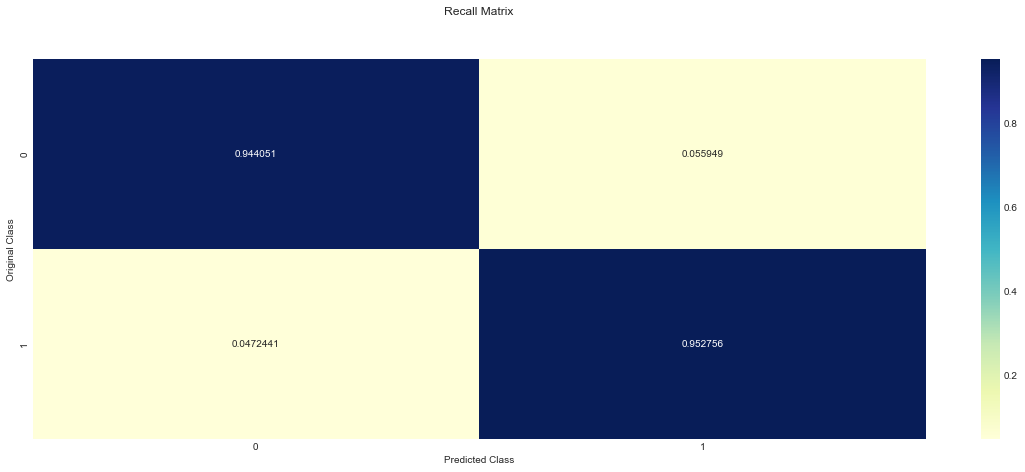

In [233]:
A = (((pd.DataFrame(confusion_metric).T)/(pd.DataFrame(confusion_metric).sum(axis=1))).T)
plt.figure(figsize=(20,7))
sns.heatmap(A, annot=True,cmap="YlGnBu", fmt='g')
plt.title('Recall Matrix', y=1.1)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
print("Recall:",recall_score(y_test, y_pred_knn))
plt.show()

The AUC Value is: 0.9484034485066138


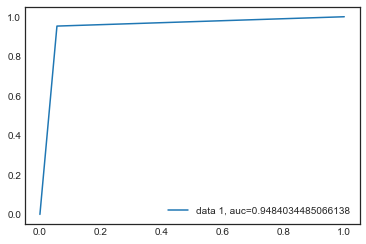

In [234]:
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_knn)
auc = roc_auc_score(y_test, y_pred_knn)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
print("The AUC Value is:", auc)
plt.legend(loc=4)
plt.show()

In [235]:
dtree = DecisionTreeClassifier()
model_3= dtree.fit(X_train,y_train)
dtree_predict= model_3.predict(X_test)
accuracy_score(dtree_predict,y_test)

0.9532710280373832

In [236]:
print(classification_report(y_test,dtree_predict))

              precision    recall  f1-score   support

          -1       0.94      0.95      0.95      1412
           1       0.96      0.96      0.96      1905

    accuracy                           0.95      3317
   macro avg       0.95      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



Accuracy: 0.9550798914681942


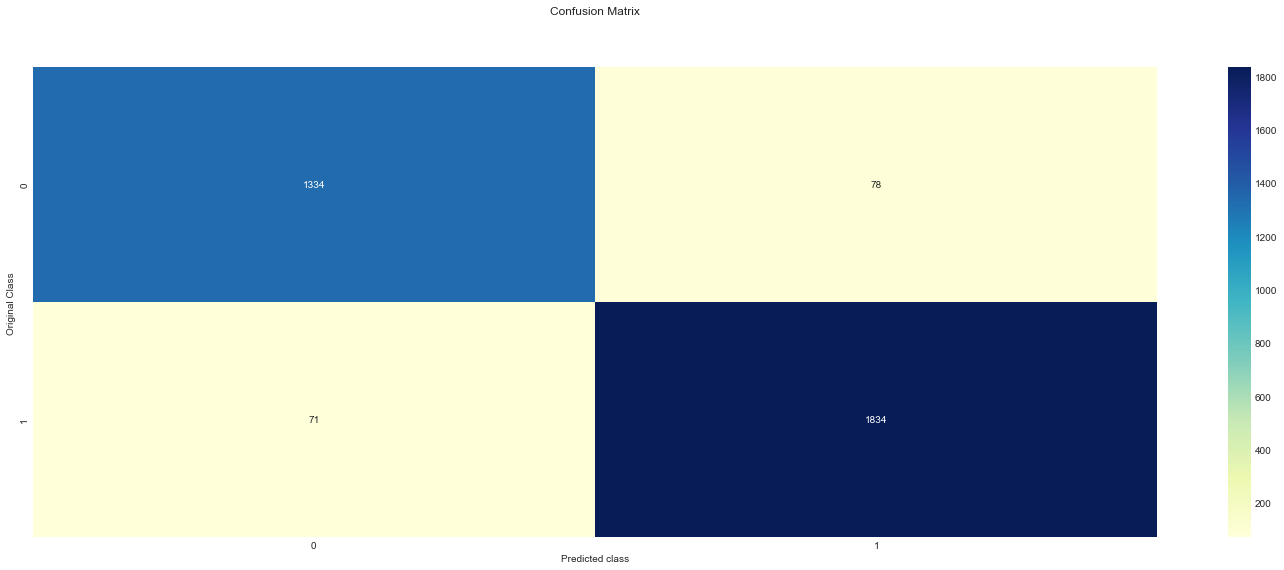

In [237]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train) 
y_pred_dtree = dtree.predict(X_test) 
confusion_metric = confusion_matrix(y_test, y_pred_dtree)
class_names=[0,1] # name of classes
# fig, ax = plt.subplots() 
#tick_marks = np.orange(Len(class_names))
#plt.xticks(tickmarks, class_names) 
#plt.yticks(tick marks, class names) 
plt.figure(figsize=(20,7))
# create heatmap 
sns.heatmap(pd.DataFrame(confusion_metric), annot=True, cmap="YlGnBu", fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion Matrix', y=1.1) 
plt.ylabel('Original Class') 
plt.xlabel('Predicted class')
print("Accuracy:",accuracy_score(y_test, y_pred_dtree))
#print("Precision: ",metrics.precision_score(y_test, y_pred_dtree)) 
#print("Recall:",metrics.recall_score(y_test, y_pred_dtree))

Precision: 0.9592050209205021


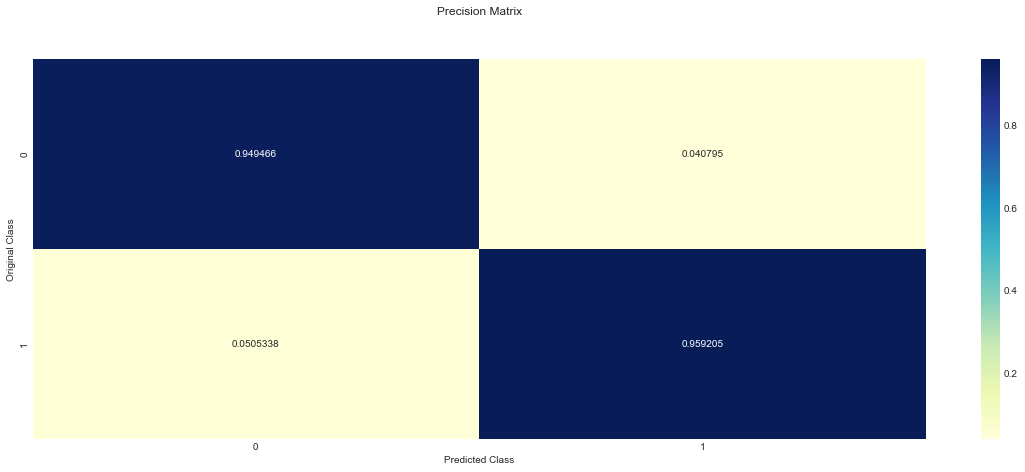

In [238]:
B = (pd.DataFrame(confusion_metric)/pd.DataFrame(confusion_metric).sum(axis=0))
plt.figure(figsize=(20,7))
sns.heatmap(B, annot=True,cmap="YlGnBu", fmt='g')
plt.title('Precision Matrix', y=1.1)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
print("Precision:",precision_score(y_test, y_pred_dtree))
plt.show()

Recall: 0.9627296587926509


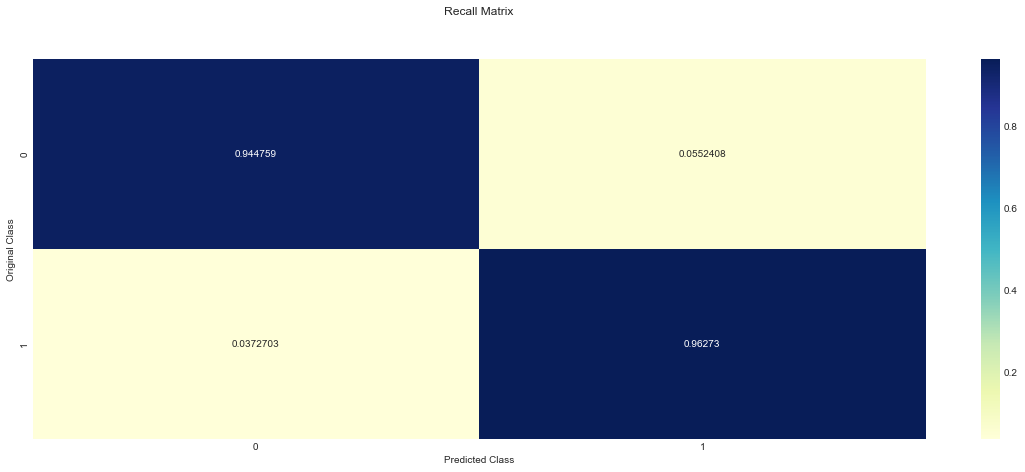

In [239]:
A = (((pd.DataFrame(confusion_metric).T)/(pd.DataFrame(confusion_metric).sum(axis=1))).T)
plt.figure(figsize=(20,7))
sns.heatmap(A, annot=True,cmap="YlGnBu", fmt='g')
plt.title('Recall Matrix', y=1.1)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
print("Recall:",recall_score(y_test, y_pred_dtree))
plt.show()

The AUC Value is: 0.9537444327957589


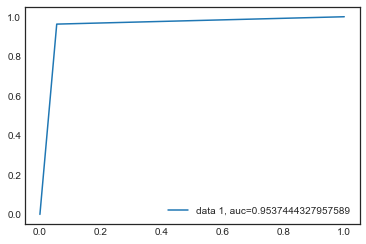

In [240]:
y_pred_proba = dtree.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_dtree)
auc = roc_auc_score(y_test, y_pred_dtree)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
print("The AUC Value is:", auc)
plt.legend(loc=4)
plt.show()

In [241]:
rfc = RandomForestClassifier()
model_4= rfc.fit(X_train,y_train)
rfc_predict= model_4.predict(X_test)
accuracy_score(rfc_predict,y_test)

0.9683448899608079

In [242]:
print(classification_report(y_test,rfc_predict))

              precision    recall  f1-score   support

          -1       0.97      0.96      0.96      1412
           1       0.97      0.98      0.97      1905

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



Accuracy: 0.9674404582454025


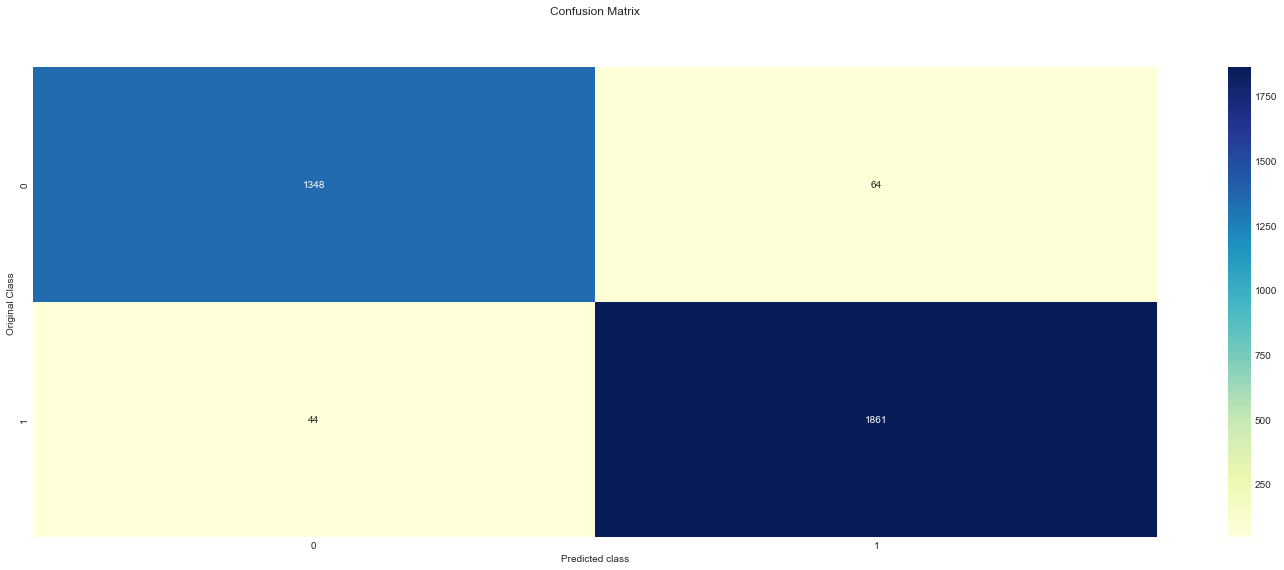

In [243]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train) 
y_pred_rfc = rfc.predict(X_test) 
confusion_metric = confusion_matrix(y_test, y_pred_rfc)
class_names=[0,1] # name of classes
# fig, ax = plt.subplots() 
#tick_marks = np.orange(Len(class_names))
#plt.xticks(tickmarks, class_names) 
#plt.yticks(tick marks, class names) 
plt.figure(figsize=(20,7))
# create heatmap 
sns.heatmap(pd.DataFrame(confusion_metric), annot=True, cmap="YlGnBu", fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion Matrix', y=1.1) 
plt.ylabel('Original Class') 
plt.xlabel('Predicted class')
print("Accuracy:",accuracy_score(y_test, y_pred_rfc))
#print("Precision: ",metrics.precision_score(y_test, y_pred_rfc)) 
#print("Recall:",metrics.recall_score(y_test, y_pred_rfc))

Precision: 0.9667532467532467


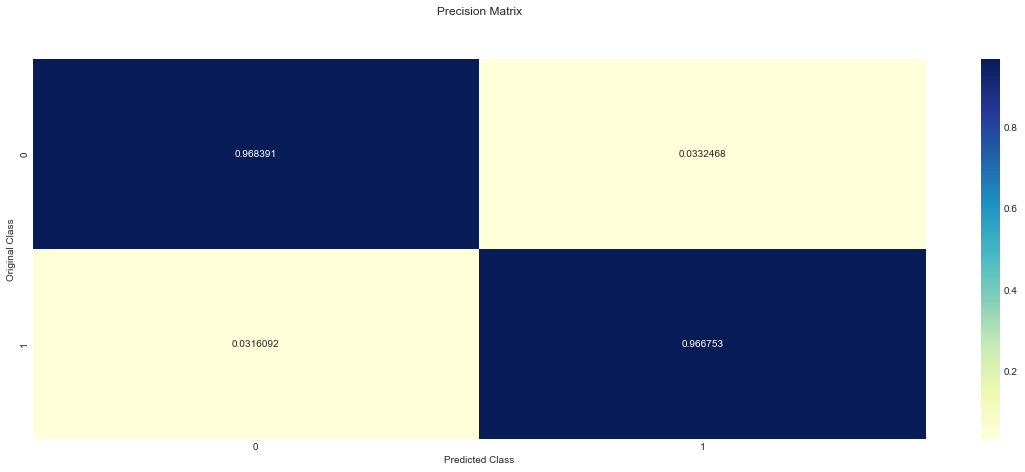

In [244]:
B = (pd.DataFrame(confusion_metric)/pd.DataFrame(confusion_metric).sum(axis=0))
plt.figure(figsize=(20,7))
sns.heatmap(B, annot=True,cmap="YlGnBu", fmt='g')
plt.title('Precision Matrix', y=1.1)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
print("Precision:",precision_score(y_test, y_pred_rfc))
plt.show()

Recall: 0.9769028871391076


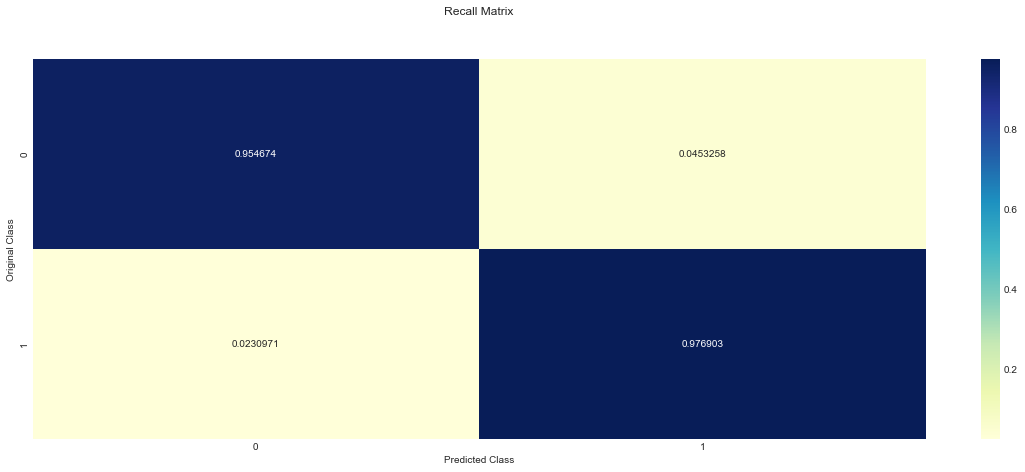

In [245]:
A = (((pd.DataFrame(confusion_metric).T)/(pd.DataFrame(confusion_metric).sum(axis=1))).T)
plt.figure(figsize=(20,7))
sns.heatmap(A, annot=True,cmap="YlGnBu", fmt='g')
plt.title('Recall Matrix', y=1.1)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
print("Recall:",recall_score(y_test, y_pred_rfc))
plt.show()

The AUC Value is: 0.9657885540511402


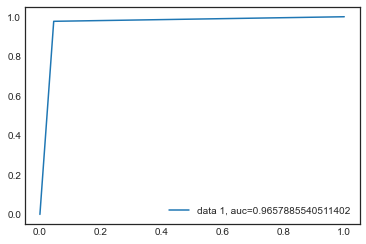

In [246]:
y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_rfc)
auc = roc_auc_score(y_test, y_pred_rfc)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
print("The AUC Value is:", auc)
plt.legend(loc=4)
plt.show()

In [247]:
svc = SVC()
model_5= svc.fit(X_train,y_train)
svc_predict= model_5.predict(X_test)
accuracy_score(svc_predict,y_test)

0.9469400060295448

In [248]:
print(classification_report(y_test,svc_predict))

              precision    recall  f1-score   support

          -1       0.95      0.93      0.94      1412
           1       0.95      0.96      0.95      1905

    accuracy                           0.95      3317
   macro avg       0.95      0.94      0.95      3317
weighted avg       0.95      0.95      0.95      3317



Accuracy: 0.9469400060295448


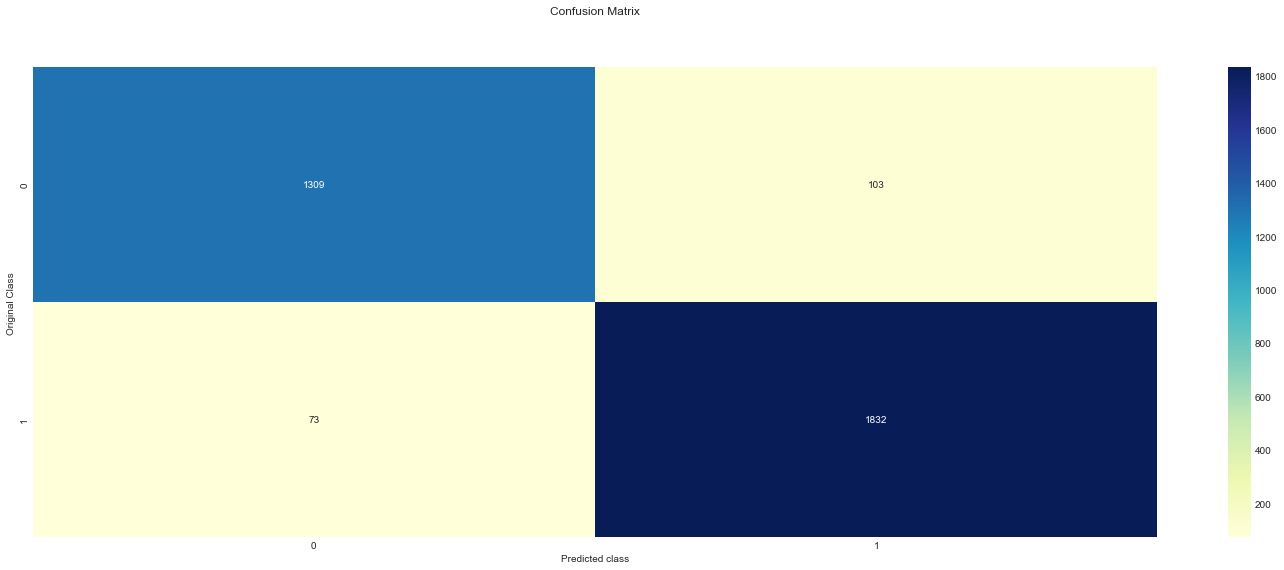

In [249]:
svc = SVC()
svc.fit(X_train,y_train) 
y_pred_svc= svc.predict(X_test) 
confusion_metric = confusion_matrix(y_test, y_pred_svc)
class_names=[0,1] # name of classes
# fig, ax = plt.subplots() 
#tick_marks = np.orange(Len(class_names))
#plt.xticks(tickmarks, class_names) 
#plt.yticks(tick marks, class names) 
plt.figure(figsize=(20,7))
# create heatmap 
sns.heatmap(pd.DataFrame(confusion_metric), annot=True, cmap="YlGnBu", fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion Matrix', y=1.1) 
plt.ylabel('Original Class') 
plt.xlabel('Predicted class')
print("Accuracy:",accuracy_score(y_test, y_pred_svc))
#print("Precision: ",metrics.precision_score(y_test, y_pred_svc)) 
#print("Recall:",metrics.recall_score(y_test, y_pred_svc))

Precision: 0.9467700258397933


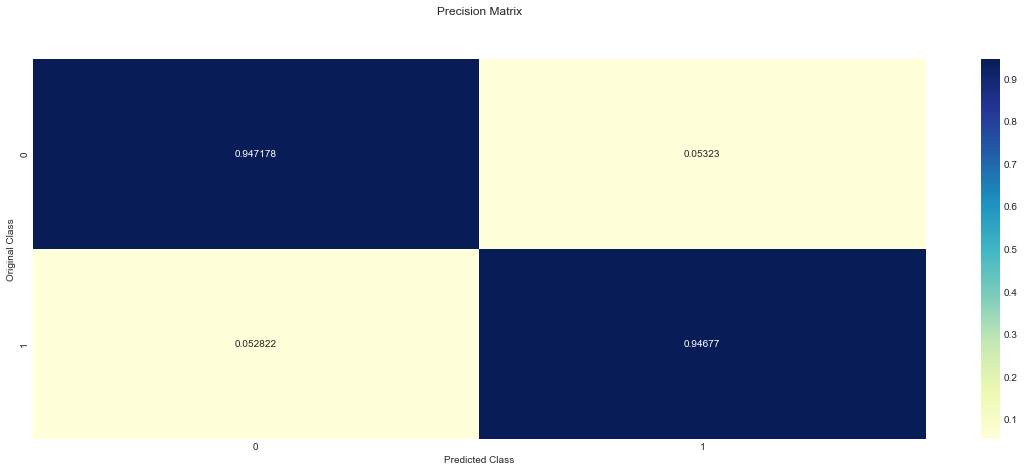

In [250]:
B = (pd.DataFrame(confusion_metric)/pd.DataFrame(confusion_metric).sum(axis=0))
plt.figure(figsize=(20,7))
sns.heatmap(B, annot=True,cmap="YlGnBu", fmt='g')
plt.title('Precision Matrix', y=1.1)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
print("Precision:",precision_score(y_test, y_pred_svc))
plt.show()

Recall: 0.9616797900262467


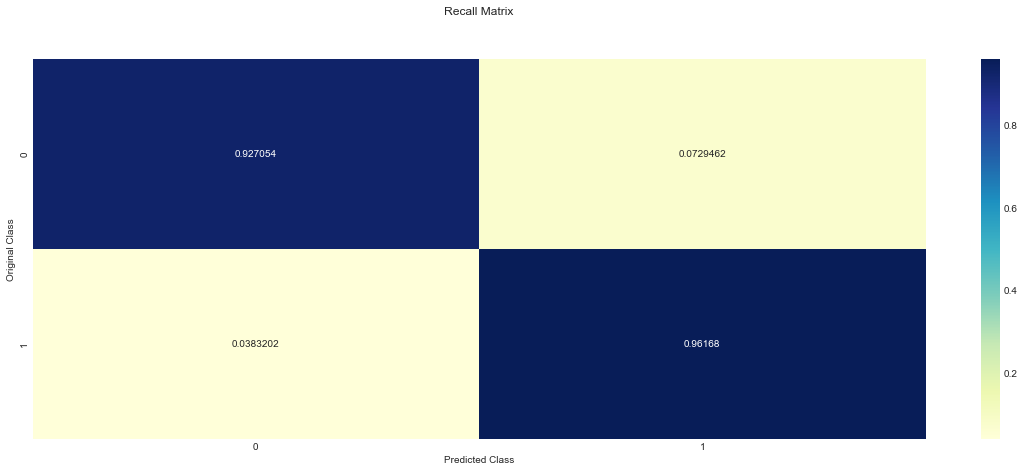

In [251]:
A = (((pd.DataFrame(confusion_metric).T)/(pd.DataFrame(confusion_metric).sum(axis=1))).T)
plt.figure(figsize=(20,7))
sns.heatmap(A, annot=True,cmap="YlGnBu", fmt='g')
plt.title('Recall Matrix', y=1.1)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
print("Recall:",recall_score(y_test, y_pred_svc))
plt.show()

The AUC Value is: 0.9443668071944264


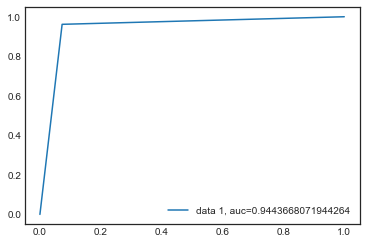

In [252]:
#y_pred_proba = svc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_svc)
auc = roc_auc_score(y_test, y_pred_svc)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
print("The AUC Value is:", auc)
plt.legend(loc=4)
plt.show()

In [253]:
adc= AdaBoostClassifier(n_estimators=5,learning_rate=1)
model_6= adc.fit(X_train,y_train)
adc_predict= model_6.predict(X_test)
accuracy_score(adc_predict,y_test)

0.9101597829363883

In [254]:
print(classification_report(y_test,adc_predict))

              precision    recall  f1-score   support

          -1       0.90      0.89      0.89      1412
           1       0.92      0.93      0.92      1905

    accuracy                           0.91      3317
   macro avg       0.91      0.91      0.91      3317
weighted avg       0.91      0.91      0.91      3317



Accuracy: 0.9101597829363883


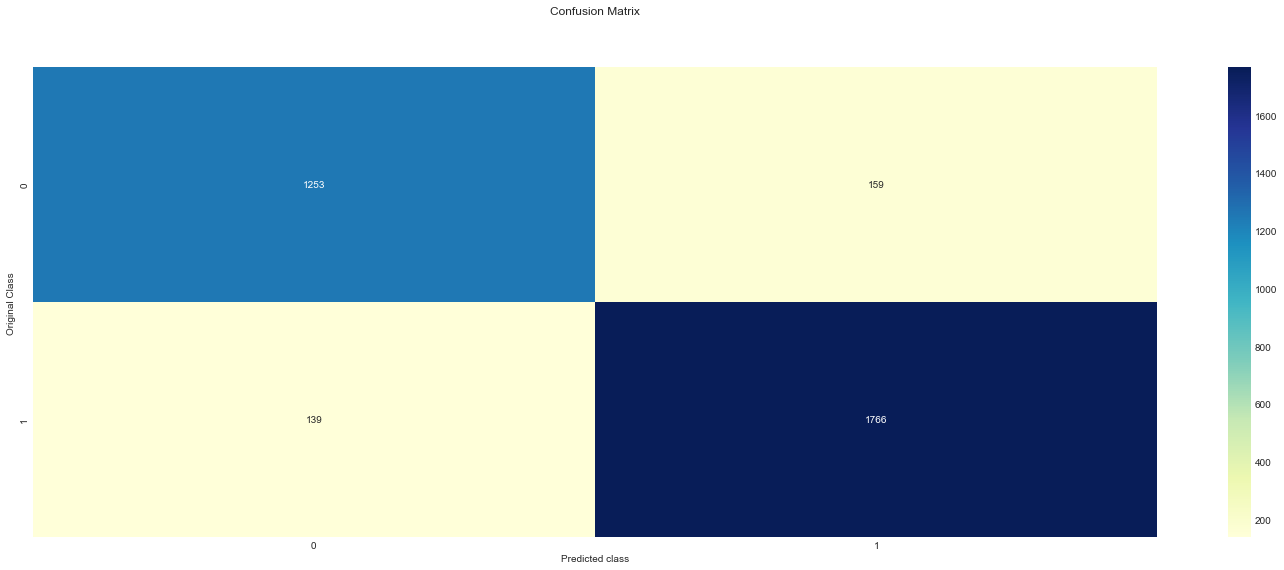

In [255]:
adc=AdaBoostClassifier(n_estimators=5,learning_rate=1)
adc.fit(X_train,y_train) 
y_pred_adc= adc.predict(X_test) 
confusion_metric = confusion_matrix(y_test, y_pred_adc)
class_names=[0,1] # name of classes
# fig, ax = plt.subplots() 
#tick_marks = np.orange(Len(class_names))
#plt.xticks(tickmarks, class_names) 
#plt.yticks(tick marks, class names) 
plt.figure(figsize=(20,7))
# create heatmap 
sns.heatmap(pd.DataFrame(confusion_metric), annot=True, cmap="YlGnBu", fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion Matrix', y=1.1) 
plt.ylabel('Original Class') 
plt.xlabel('Predicted class')
print("Accuracy:",accuracy_score(y_test, y_pred_adc))
#print("Precision: ",metrics.precision_score(y_test, y_pred_adc)) 
#print("Recall:",metrics.recall_score(y_test, y_pred_adc))

Precision: 0.9174025974025974


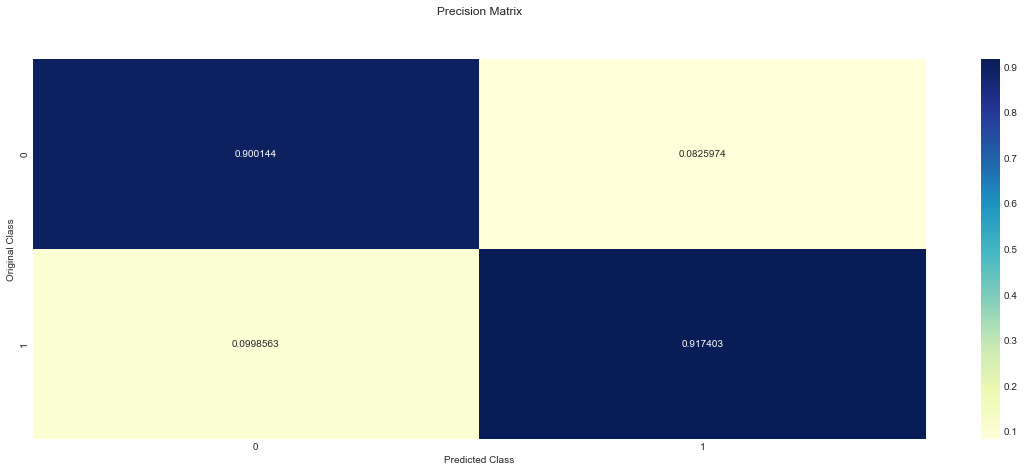

In [256]:
B = (pd.DataFrame(confusion_metric)/pd.DataFrame(confusion_metric).sum(axis=0))
plt.figure(figsize=(20,7))
sns.heatmap(B, annot=True,cmap="YlGnBu", fmt='g')
plt.title('Precision Matrix', y=1.1)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
print("Precision:",precision_score(y_test, y_pred_adc))
plt.show()

Recall: 0.9270341207349081


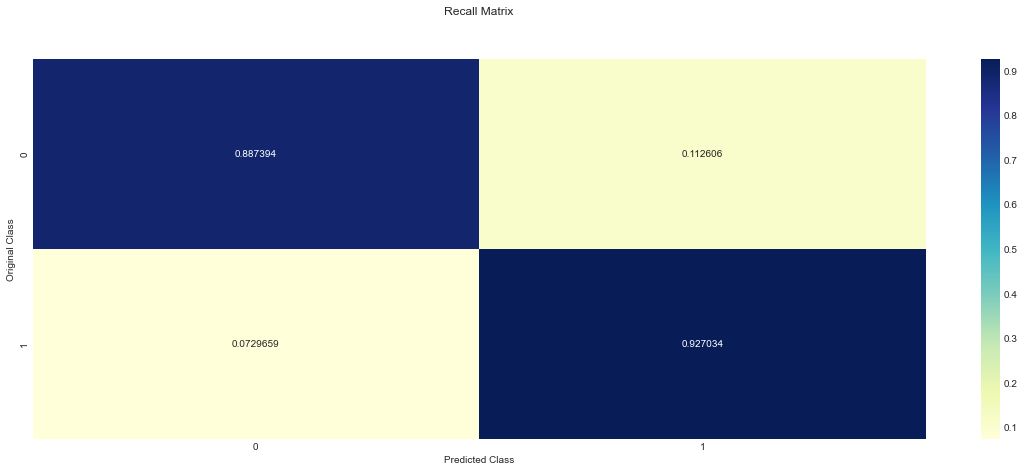

In [257]:
A = (((pd.DataFrame(confusion_metric).T)/(pd.DataFrame(confusion_metric).sum(axis=1))).T)
plt.figure(figsize=(20,7))
sns.heatmap(A, annot=True,cmap="YlGnBu", fmt='g')
plt.title('Recall Matrix', y=1.1)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
print("Recall:",recall_score(y_test, y_pred_adc))
plt.show()

The AUC Value is: 0.9072139442201453


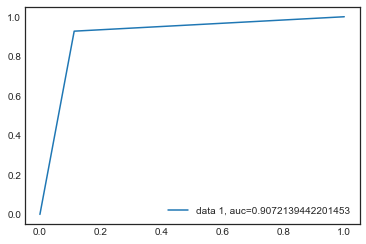

In [258]:
y_pred_proba = adc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_adc)
auc = roc_auc_score(y_test, y_pred_adc)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
print("The AUC Value is:", auc)
plt.legend(loc=4)
plt.show()

In [259]:
naive_bayes = GaussianNB()
model_7= naive_bayes.fit(X_train,y_train)
naive_bayes_predict= model_7.predict(X_test)
accuracy_score(naive_bayes_predict,y_test)

0.5908953873982514

In [260]:
print(classification_report(y_test,naive_bayes_predict))

              precision    recall  f1-score   support

          -1       0.51      1.00      0.68      1412
           1       1.00      0.29      0.45      1905

    accuracy                           0.59      3317
   macro avg       0.75      0.64      0.56      3317
weighted avg       0.79      0.59      0.54      3317



Accuracy: 0.5908953873982514


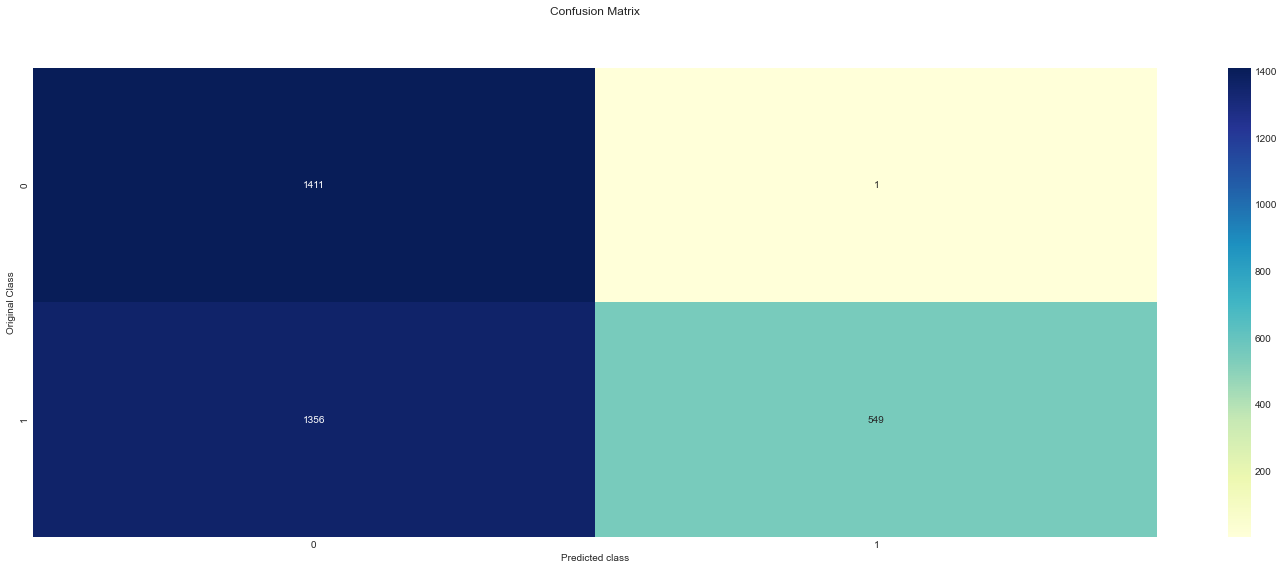

In [261]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train) 
y_pred_naive_bayes= naive_bayes.predict(X_test) 
confusion_metric = confusion_matrix(y_test, y_pred_naive_bayes)
class_names=[0,1] # name of classes
# fig, ax = plt.subplots() 
#tick_marks = np.orange(Len(class_names))
#plt.xticks(tickmarks, class_names) 
#plt.yticks(tick marks, class names) 
plt.figure(figsize=(20,7))
# create heatmap 
sns.heatmap(pd.DataFrame(confusion_metric), annot=True, cmap="YlGnBu", fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion Matrix', y=1.1) 
plt.ylabel('Original Class') 
plt.xlabel('Predicted class')
print("Accuracy:",accuracy_score(y_test, y_pred_naive_bayes))
#print("Precision: ",metrics.precision_score(y_test, y_pred_naive_bayes)) 
#print("Recall:",metrics.recall_score(y_test, y_pred_naive_bayes))

Precision: 0.9981818181818182


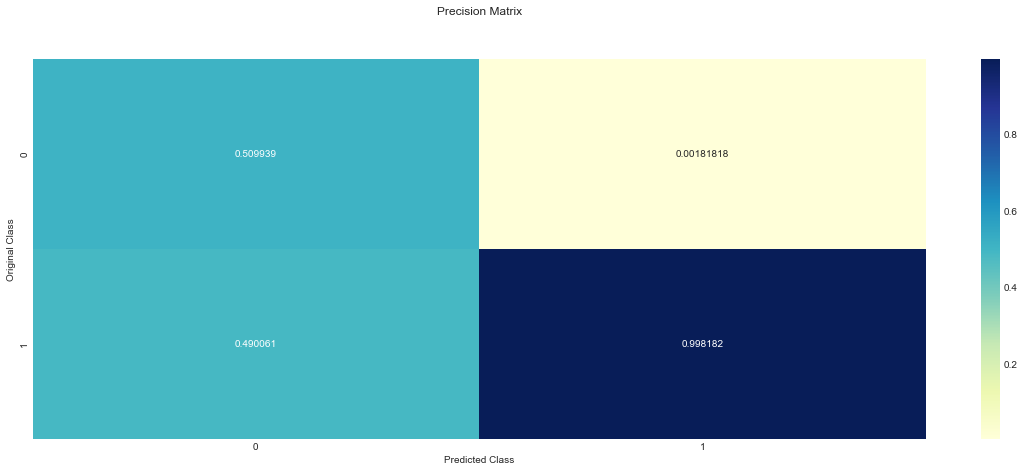

In [262]:
B = (pd.DataFrame(confusion_metric)/pd.DataFrame(confusion_metric).sum(axis=0))
plt.figure(figsize=(20,7))
sns.heatmap(B, annot=True,cmap="YlGnBu", fmt='g')
plt.title('Precision Matrix', y=1.1)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
print("Precision:",precision_score(y_test, y_pred_naive_bayes))
plt.show()

Recall: 0.28818897637795277


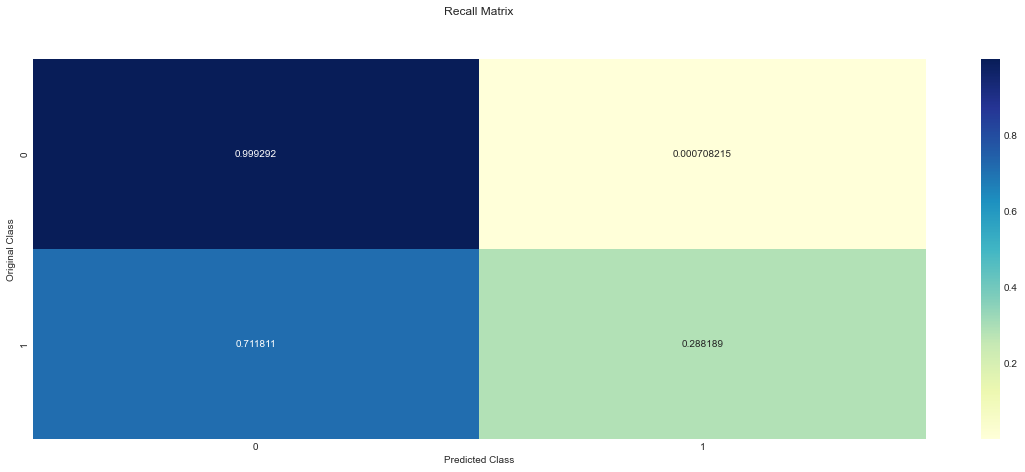

In [265]:
A = (((pd.DataFrame(confusion_metric).T)/(pd.DataFrame(confusion_metric).sum(axis=1))).T)
plt.figure(figsize=(20,7))
sns.heatmap(A, annot=True,cmap="YlGnBu", fmt='g')
plt.title('Recall Matrix', y=1.1)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
print("Recall:",recall_score(y_test, y_pred_naive_bayes))
plt.show()

The AUC Value is: 0.6437403805402512


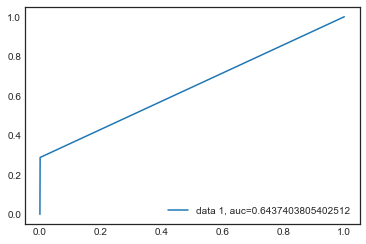

In [266]:
y_pred_proba = naive_bayes.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_naive_bayes)
auc = roc_auc_score(y_test, y_pred_naive_bayes)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
print("The AUC Value is:", auc)
plt.legend(loc=4)
plt.show()

In [267]:
sgdc = SGDClassifier(loss='modified_huber', shuffle=True, random_state=90)
model_8= sgdc.fit(X_train,y_train)
sgdc_predict= model_8.predict(X_test)
accuracy_score(sgdc_predict,y_test)

0.9207114862827857

In [268]:
print(classification_report(y_test,sgdc_predict))

              precision    recall  f1-score   support

          -1       0.95      0.86      0.90      1412
           1       0.90      0.97      0.93      1905

    accuracy                           0.92      3317
   macro avg       0.93      0.91      0.92      3317
weighted avg       0.92      0.92      0.92      3317



Accuracy: 0.9207114862827857


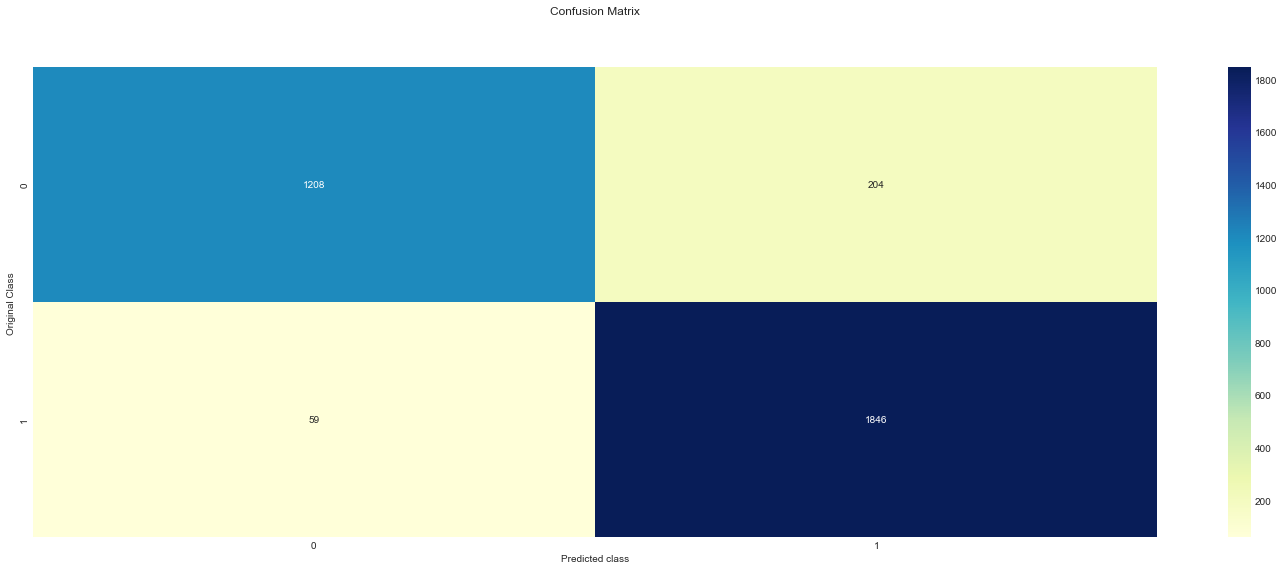

In [269]:
sgdc = SGDClassifier(loss='modified_huber', shuffle=True, random_state=90)
sgdc.fit(X_train,y_train) 
y_pred_sgdc= sgdc.predict(X_test) 
confusion_metric = confusion_matrix(y_test, y_pred_sgdc)
class_names=[0,1] # name of classes
# fig, ax = plt.subplots() 
#tick_marks = np.orange(Len(class_names))
#plt.xticks(tickmarks, class_names) 
#plt.yticks(tick marks, class names) 
plt.figure(figsize=(20,7))
# create heatmap 
sns.heatmap(pd.DataFrame(confusion_metric), annot=True, cmap="YlGnBu", fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion Matrix', y=1.1) 
plt.ylabel('Original Class') 
plt.xlabel('Predicted class')
print("Accuracy:",accuracy_score(y_test, y_pred_sgdc))
#print("Precision: ",metrics.precision_score(y_test, y_pred_sgdc)) 
#print("Recall:",metrics.recall_score(y_test, y_pred_sgdc))

Precision: 0.9004878048780488


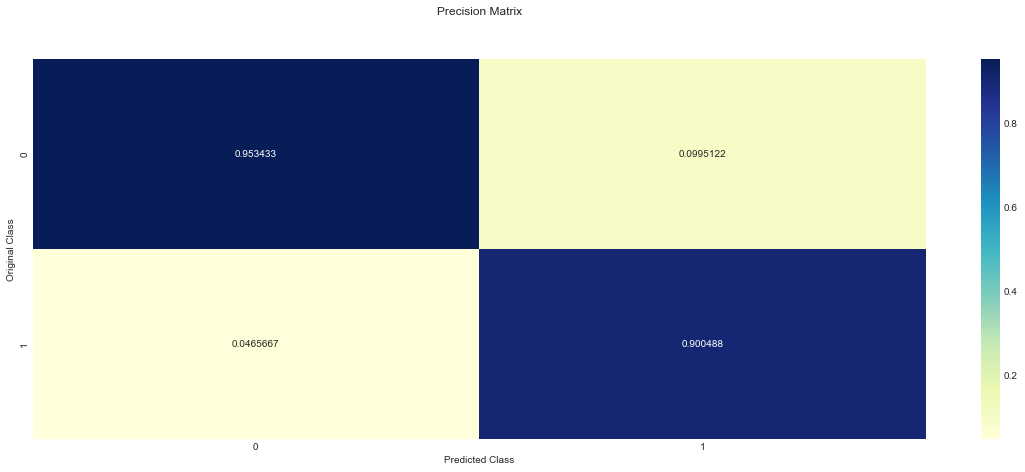

In [270]:
B = (pd.DataFrame(confusion_metric)/pd.DataFrame(confusion_metric).sum(axis=0))
plt.figure(figsize=(20,7))
sns.heatmap(B, annot=True,cmap="YlGnBu", fmt='g')
plt.title('Precision Matrix', y=1.1)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
print("Precision:",precision_score(y_test, y_pred_sgdc))
plt.show()

Recall: 0.9690288713910761


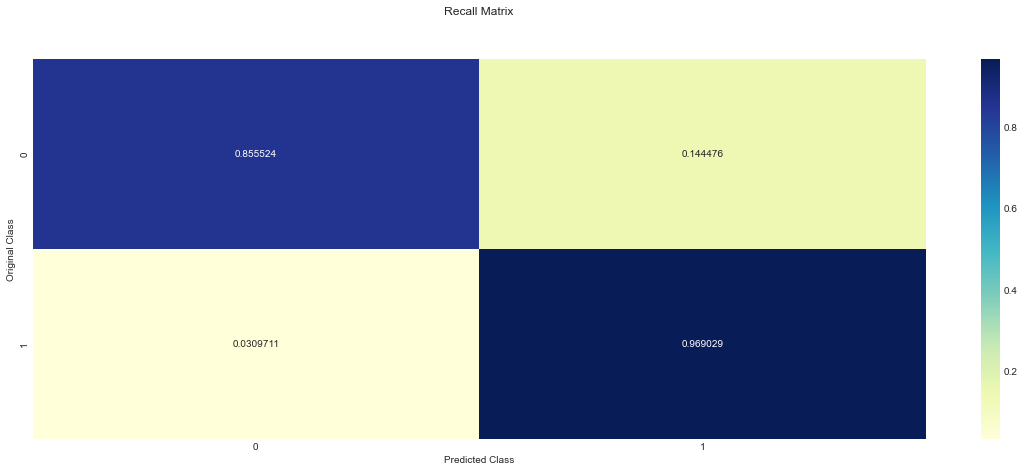

In [271]:
A = (((pd.DataFrame(confusion_metric).T)/(pd.DataFrame(confusion_metric).sum(axis=1))).T)
plt.figure(figsize=(20,7))
sns.heatmap(A, annot=True,cmap="YlGnBu", fmt='g')
plt.title('Recall Matrix', y=1.1)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
print("Recall:",recall_score(y_test, y_pred_sgdc))
plt.show()

The AUC Value is: 0.9122764753555946


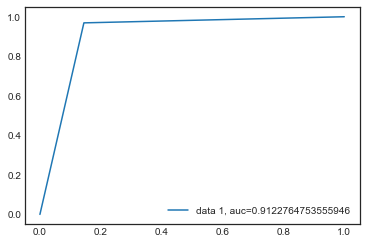

In [272]:
y_pred_proba = sgdc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_sgdc)
auc = roc_auc_score(y_test, y_pred_sgdc)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
print("The AUC Value is:", auc)
plt.legend(loc=4)
plt.show()

In [273]:
print('Logistic Regression Classifier Accuracy:',accuracy_score(logreg_predict,y_test))
print('K-Nearest Neighbour Classifier Accuracy:',accuracy_score(knn_predict,y_test))
print('Decision Tree Classifier Accuracy:',accuracy_score(dtree_predict,y_test))
print('Random Forest Classifier Accuracy:',accuracy_score(rfc_predict,y_test))
print('Support Vector Machine Classifier Accuracy:',accuracy_score(svc_predict,y_test))
print('Adaboost Classifier Accuracy:',accuracy_score(adc_predict,y_test))
print('Gaussian Naives Bayes Classifier Accuracy:',accuracy_score(naive_bayes_predict,y_test))
print('Stochaistic Gradient Descent Classifier Accuracy:',accuracy_score(sgdc_predict,y_test))

Logistic Regression Classifier Accuracy: 0.9255351220982816
K-Nearest Neighbour Classifier Accuracy: 0.9490503466988243
Decision Tree Classifier Accuracy: 0.9532710280373832
Random Forest Classifier Accuracy: 0.9683448899608079
Support Vector Machine Classifier Accuracy: 0.9469400060295448
Adaboost Classifier Accuracy: 0.9101597829363883
Gaussian Naives Bayes Classifier Accuracy: 0.5908953873982514
Stochaistic Gradient Descent Classifier Accuracy: 0.9207114862827857


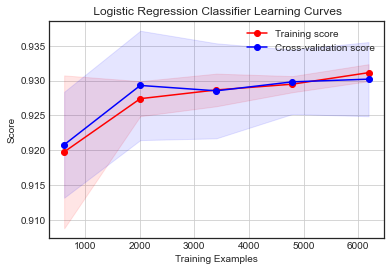

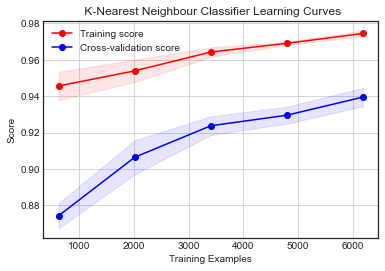

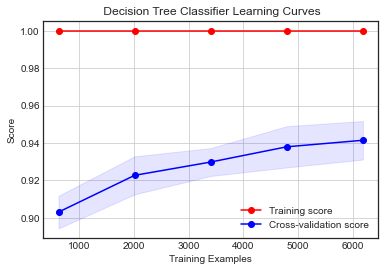

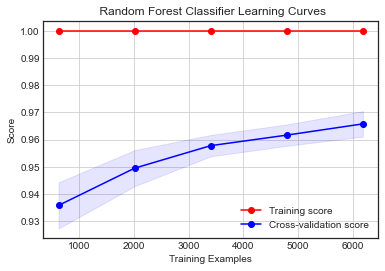

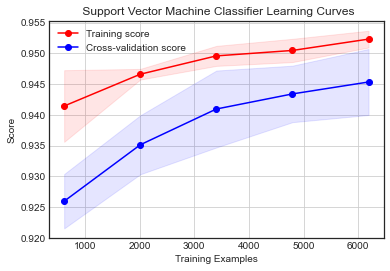

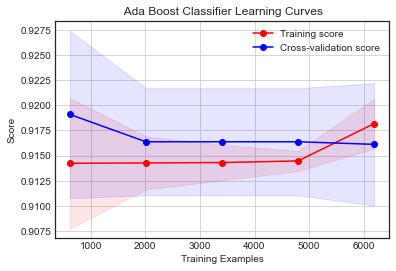

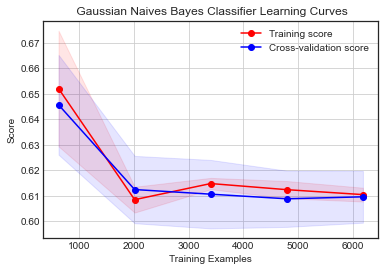

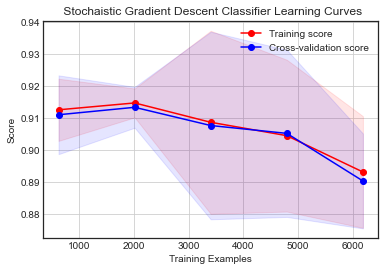

In [274]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator,title,X,y,ylim=None,cv=None,n_jobs=-1,train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(model_1," Logistic Regression Classifier Learning Curves",X_train,y_train)
g = plot_learning_curve(model_2," K-Nearest Neighbour Classifier Learning Curves",X_train,y_train)
g = plot_learning_curve(model_3," Decision Tree Classifier Learning Curves",X_train,y_train)
g = plot_learning_curve(model_4," Random Forest Classifier Learning Curves",X_train,y_train)
g = plot_learning_curve(model_5," Support Vector Machine Classifier Learning Curves",X_train,y_train)
g = plot_learning_curve(model_6," Ada Boost Classifier Learning Curves",X_train,y_train)
g = plot_learning_curve(model_7," Gaussian Naives Bayes Classifier Learning Curves",X_train,y_train)
g = plot_learning_curve(model_8," Stochaistic Gradient Descent Classifier Learning Curves",X_train,y_train)


(array([  3.,  15.,  53., 132., 234., 242., 184.,  99.,  30.,   8.]),
 array([-3.31691693, -2.680072  , -2.04322707, -1.40638214, -0.76953721,
        -0.13269228,  0.50415265,  1.14099757,  1.7778425 ,  2.41468743,
         3.05153236]),
 <BarContainer object of 10 artists>)

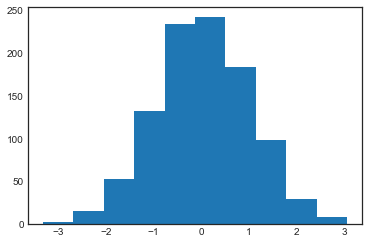

In [275]:
plt.style.use('seaborn-white')
data_variants = np.random.randn(1000)
plt.hist(data_variants)